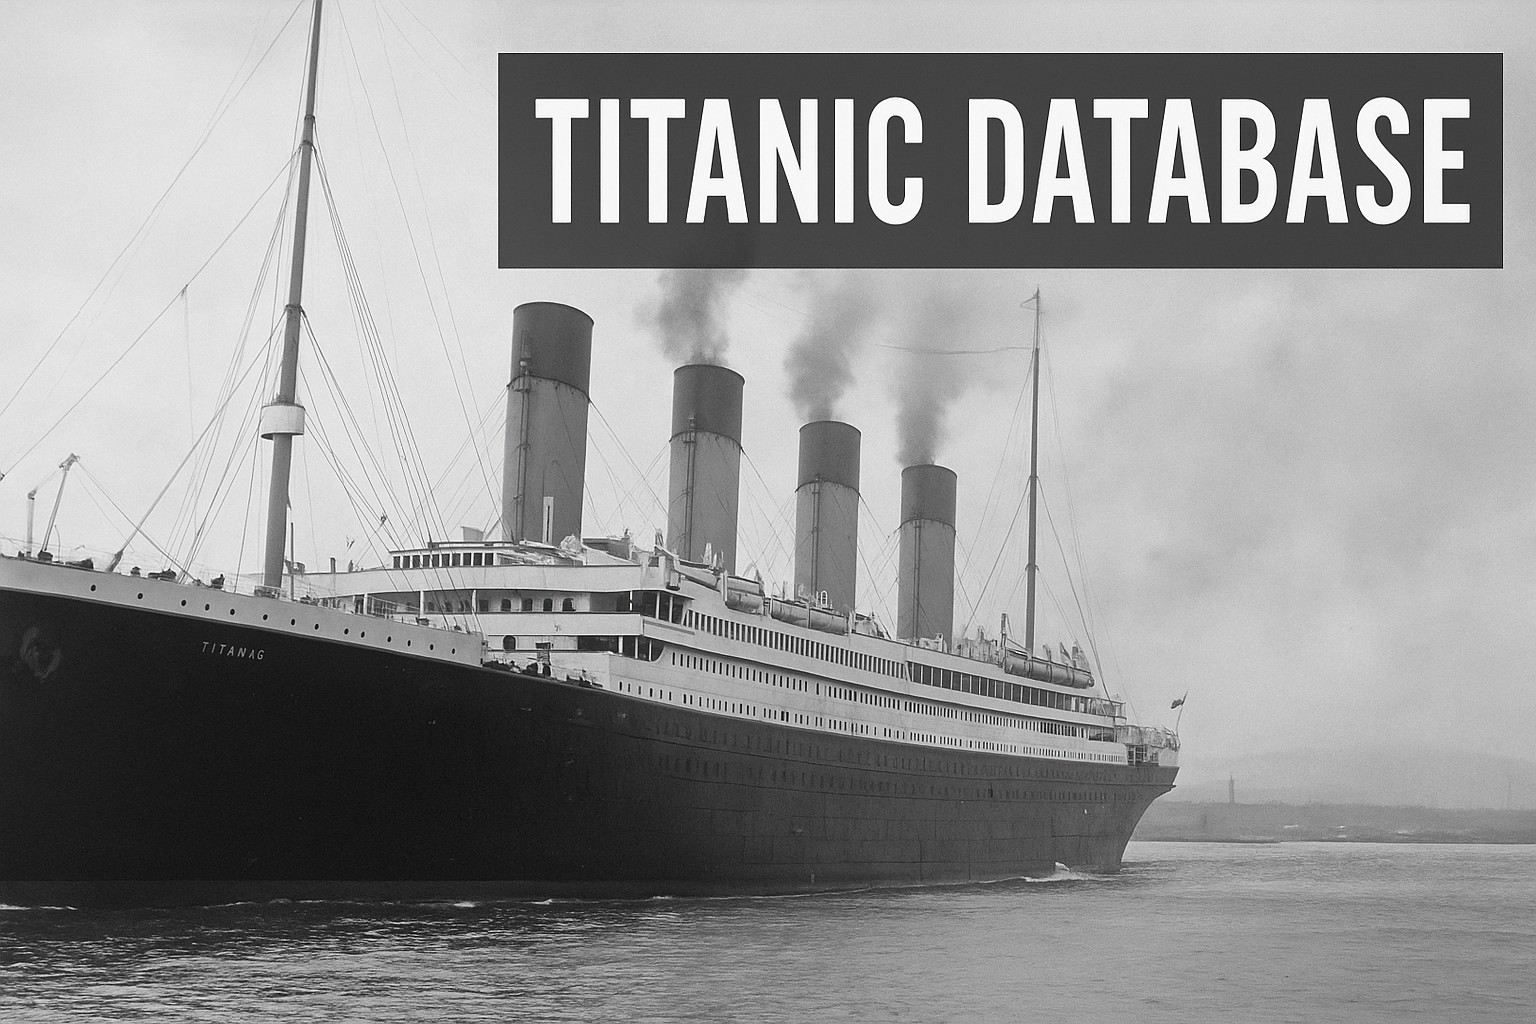

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


0-- Died  1--Survived


In [3]:
print(df["Survived"].value_counts())


Survived
0    549
1    342
Name: count, dtype: int64


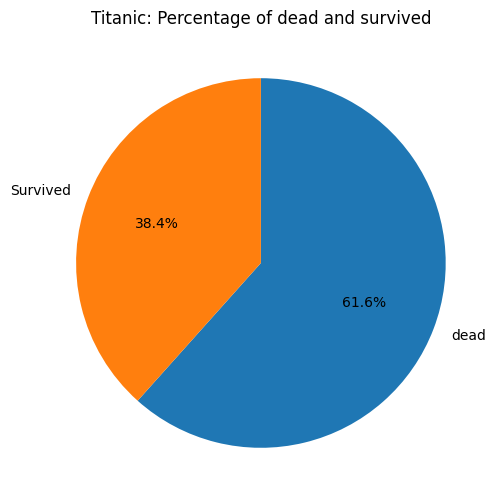

In [4]:
import matplotlib.pyplot as plt

survival_counts = df["Survived"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    survival_counts,
    labels=["dead", "Survived"],
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)
plt.title("Titanic: Percentage of dead and survived")
plt.show()


<Figure size 600x400 with 0 Axes>

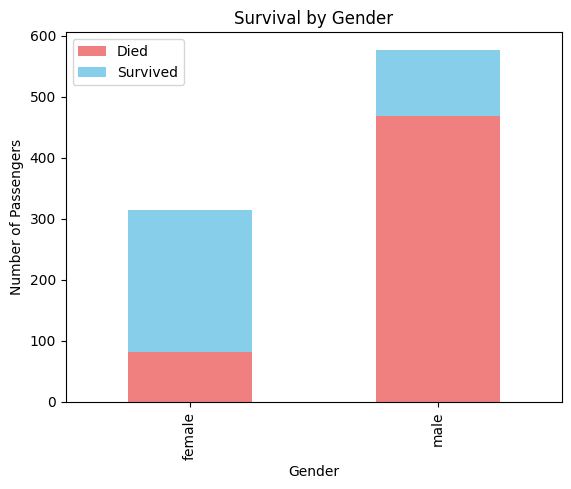

In [5]:
grouped = df.groupby(["Sex", "Survived"]).size().unstack()

plt.figure(figsize=(6,4))
grouped.plot(
    kind="bar",
    stacked=True,
    color=["lightcoral", "skyblue"],  # 0=死亡, 1=生存
)

plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.legend(["Died", "Survived"])
plt.show()

/tmp/ipython-input-906588807.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df.groupby(["AgeGroup", "Survived"]).size().unstack()


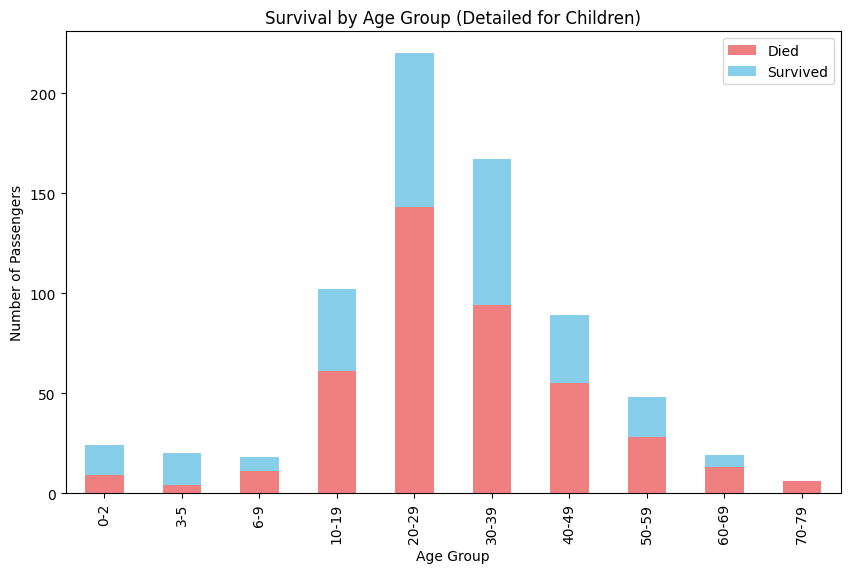

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 細かい年齢区間を設定
bins = [0, 3, 6, 10, 20, 30, 40, 50, 60, 70, 80]
labels = [
    "0-2", "3-5", "6-9",
    "10-19", "20-29", "30-39", "40-49",
    "50-59", "60-69", "70-79"
]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# 年齢区間ごとに生存/死亡を集計
age_grouped = df.groupby(["AgeGroup", "Survived"]).size().unstack()

# 積み上げ棒グラフ
age_grouped.plot(
    kind="bar",
    stacked=True,
    color=["lightcoral", "skyblue"],  # 0=死亡, 1=生存
    figsize=(10,6)
)

plt.title("Survival by Age Group (Detailed for Children)")
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")
plt.legend(["Died", "Survived"])
plt.show()


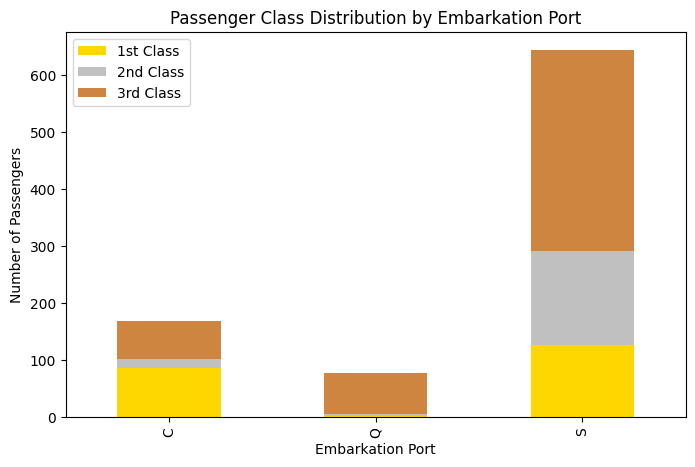

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# クロス集計（港×クラス）
table = pd.crosstab(df["Embarked"], df["Pclass"])

# 積み上げ棒グラフ
table.plot(kind="bar", stacked=True, figsize=(8,5), color=["gold", "silver", "peru"])
plt.title("Passenger Class Distribution by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Number of Passengers")
plt.legend(["1st Class", "2nd Class", "3rd Class"])
plt.show()


C = Cherbourg France

Q = Queenstown Ireland

S = Southampton The UK

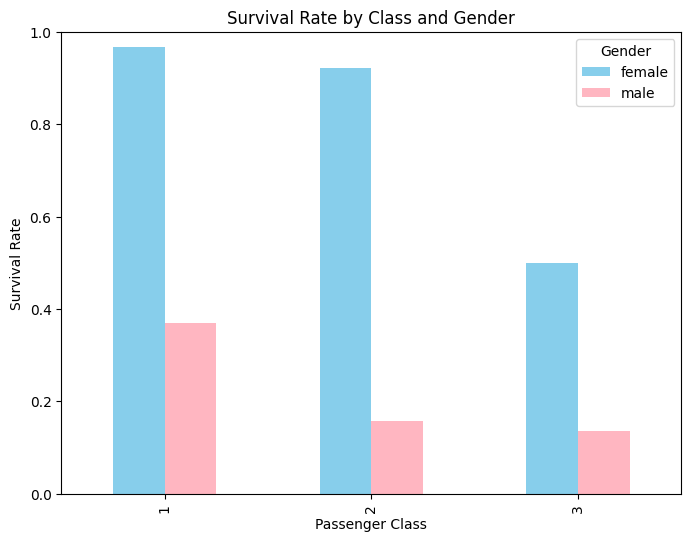

In [8]:
pclass_sex_survival = df.groupby(["Pclass", "Sex"])["Survived"].mean().unstack()

# 棒グラフ（並列）
pclass_sex_survival.plot(
    kind="bar",
    figsize=(8,6),
    color=["skyblue", "lightpink"]
)

plt.title("Survival Rate by Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.legend(title="Gender")
plt.show()

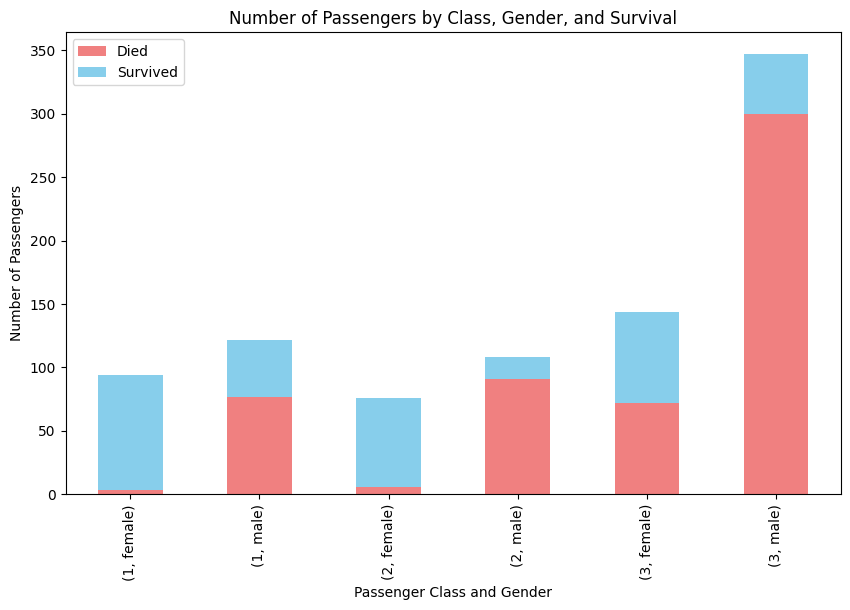

In [9]:
# クロス集計: Pclass × Sex × Survived の人数
pclass_sex_counts = df.groupby(["Pclass", "Sex", "Survived"]).size().unstack()

# 棒グラフ化（生存=1, 死亡=0を2色に分けて表示）
pclass_sex_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=["lightcoral", "skyblue"]  # 0=死亡, 1=生存
)

plt.title("Number of Passengers by Class, Gender, and Survival")
plt.xlabel("Passenger Class and Gender")
plt.ylabel("Number of Passengers")
plt.legend(["Died", "Survived"])
plt.show()

Many first-class men who survived the Titanic faced harsh social criticism.
Society branded them as "cowards" for living while women and children died.
In contrast, those who perished were often remembered as heroic gentlemen.

/tmp/ipython-input-1097864086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df["FareGroup"] = pd.cut(male_df["Fare"], bins=fare_bins, labels=fare_labels, right=False)
/tmp/ipython-input-1097864086.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = male_df.groupby("FareGroup")["Survived"].mean()


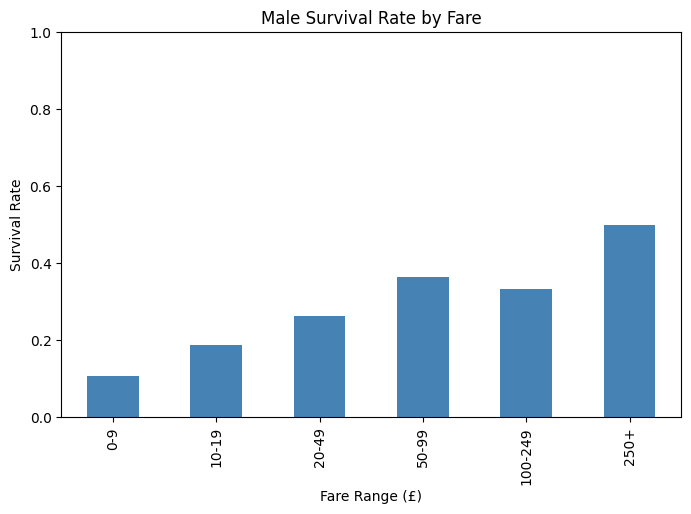

In [11]:
male_df = df[df["Sex"] == "male"]


fare_bins = [0, 10, 20, 50, 100, 250, 600]
fare_labels = ["0-9", "10-19", "20-49", "50-99", "100-249", "250+"]

male_df["FareGroup"] = pd.cut(male_df["Fare"], bins=fare_bins, labels=fare_labels, right=False)


fare_survival = male_df.groupby("FareGroup")["Survived"].mean()



fare_survival.plot(kind="bar", color="steelblue", figsize=(8,5))
plt.title("Male Survival Rate by Fare")
plt.xlabel("Fare Range (£)")
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.show()

/tmp/ipython-input-905575119.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df["FareGroup"] = pd.cut(
/tmp/ipython-input-905575119.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival_female = female_df.groupby("FareGroup")["Survived"].mean()


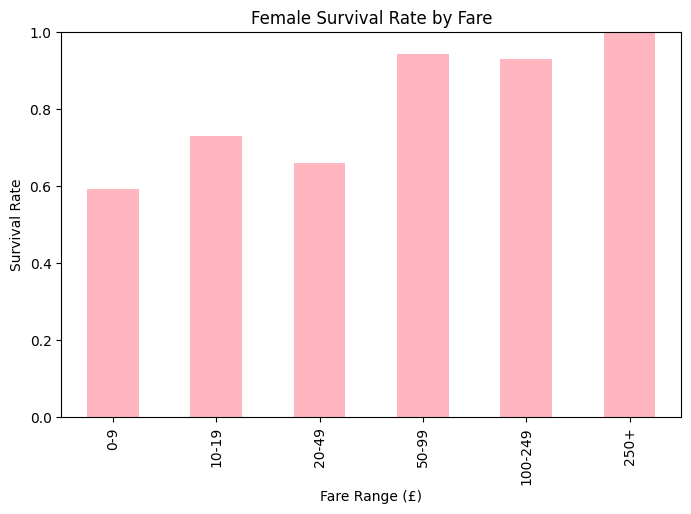

In [13]:

# 女性だけ抽出
female_df = df[df["Sex"] == "female"]

# Fareを区間に分ける（例：0-9, 10-19, 20-49, 50-99, 100-249, 250+）
fare_bins = [0, 10, 20, 50, 100, 250, 600]
fare_labels = ["0-9", "10-19", "20-49", "50-99", "100-249", "250+"]

female_df["FareGroup"] = pd.cut(
    female_df["Fare"],
    bins=fare_bins,
    labels=fare_labels,
    right=False
)

# 区間ごとの生存率
fare_survival_female = female_df.groupby("FareGroup")["Survived"].mean()

# 棒グラフ
fare_survival_female.plot(kind="bar", color="lightpink", figsize=(8,5))
plt.title("Female Survival Rate by Fare")
plt.xlabel("Fare Range (£)")
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.show()

/tmp/ipython-input-2923737146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df["FamilySize"] = male_df["SibSp"] + male_df["Parch"]


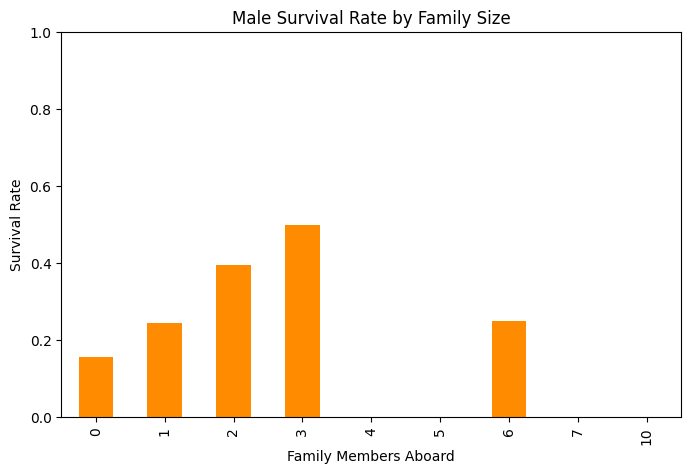

In [12]:
# 家族人数（兄弟・配偶者 + 両親・子ども）
male_df["FamilySize"] = male_df["SibSp"] + male_df["Parch"]

# 家族人数ごとの生存率
family_survival = male_df.groupby("FamilySize")["Survived"].mean()

# 棒グラフ
family_survival.plot(kind="bar", color="darkorange", figsize=(8,5))
plt.title("Male Survival Rate by Family Size")
plt.xlabel("Family Members Aboard")
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.show()


/tmp/ipython-input-1554024790.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df["FamilySize"] = male_df["SibSp"] + male_df["Parch"]


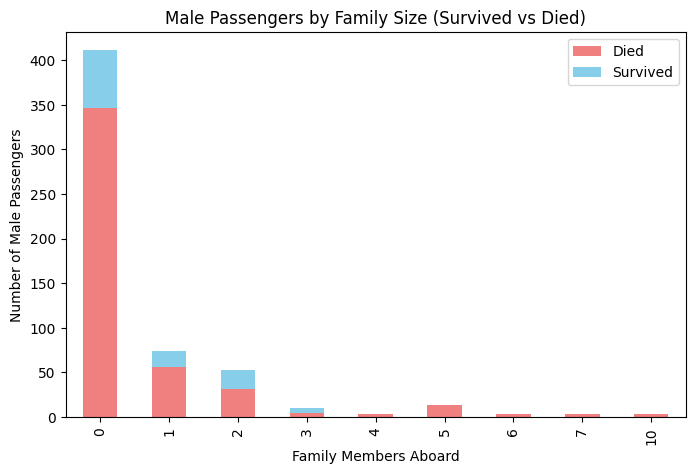

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 男性だけ抽出
male_df = df[df["Sex"] == "male"]

# 家族人数（兄弟・配偶者 + 両親・子ども）
male_df["FamilySize"] = male_df["SibSp"] + male_df["Parch"]

# FamilySize × Survived のクロス集計
family_counts = male_df.groupby(["FamilySize", "Survived"]).size().unstack().fillna(0)

# 積み上げ棒グラフ
family_counts.plot(
    kind="bar",
    stacked=True,
    color=["lightcoral", "skyblue"],  # 0=死亡, 1=生存
    figsize=(8,5)
)

plt.title("Male Passengers by Family Size (Survived vs Died)")
plt.xlabel("Family Members Aboard")
plt.ylabel("Number of Male Passengers")
plt.legend(["Died", "Survived"])
plt.show()

/tmp/ipython-input-3304285673.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_class_males["FamilySize"] = first_class_males["SibSp"] + first_class_males["Parch"]


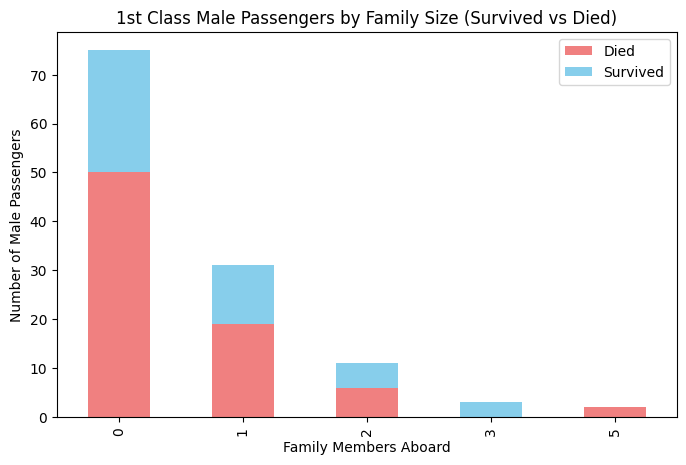

In [15]:
# 1等男性だけ抽出
first_class_males = df[(df["Sex"] == "male") & (df["Pclass"] == 1)]

# 家族人数（兄弟・配偶者 + 両親・子ども）
first_class_males["FamilySize"] = first_class_males["SibSp"] + first_class_males["Parch"]

# FamilySize × Survived のクロス集計
family_counts_first_male = first_class_males.groupby(["FamilySize", "Survived"]).size().unstack().fillna(0)

# 積み上げ棒グラフ
family_counts_first_male.plot(
    kind="bar",
    stacked=True,
    color=["lightcoral", "skyblue"],  # 0=死亡, 1=生存
    figsize=(8,5)
)

plt.title("1st Class Male Passengers by Family Size (Survived vs Died)")
plt.xlabel("Family Members Aboard")
plt.ylabel("Number of Male Passengers")
plt.legend(["Died", "Survived"])
plt.show()


/tmp/ipython-input-1050728732.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_class_males["FamilySize"] = first_class_males["SibSp"] + first_class_males["Parch"]


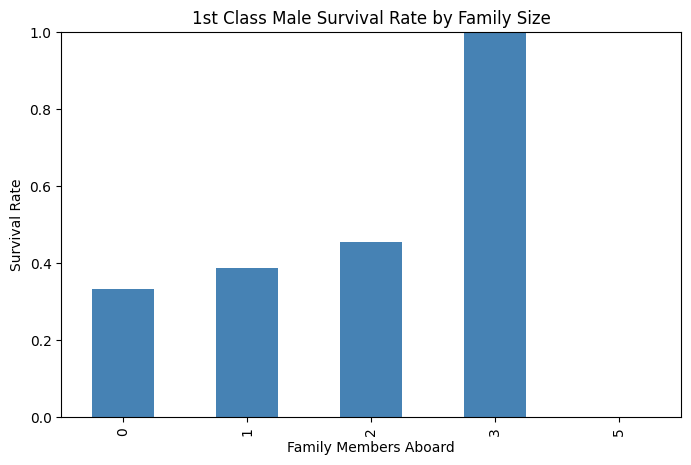

In [16]:
# 1等男性だけ抽出
first_class_males = df[(df["Sex"] == "male") & (df["Pclass"] == 1)]

# 家族人数
first_class_males["FamilySize"] = first_class_males["SibSp"] + first_class_males["Parch"]

# FamilySizeごとの生存率
family_survival_first_male = first_class_males.groupby("FamilySize")["Survived"].mean()

# 棒グラフ
family_survival_first_male.plot(
    kind="bar",
    color="steelblue",
    figsize=(8,5)
)

plt.title("1st Class Male Survival Rate by Family Size")
plt.xlabel("Family Members Aboard")
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.show()


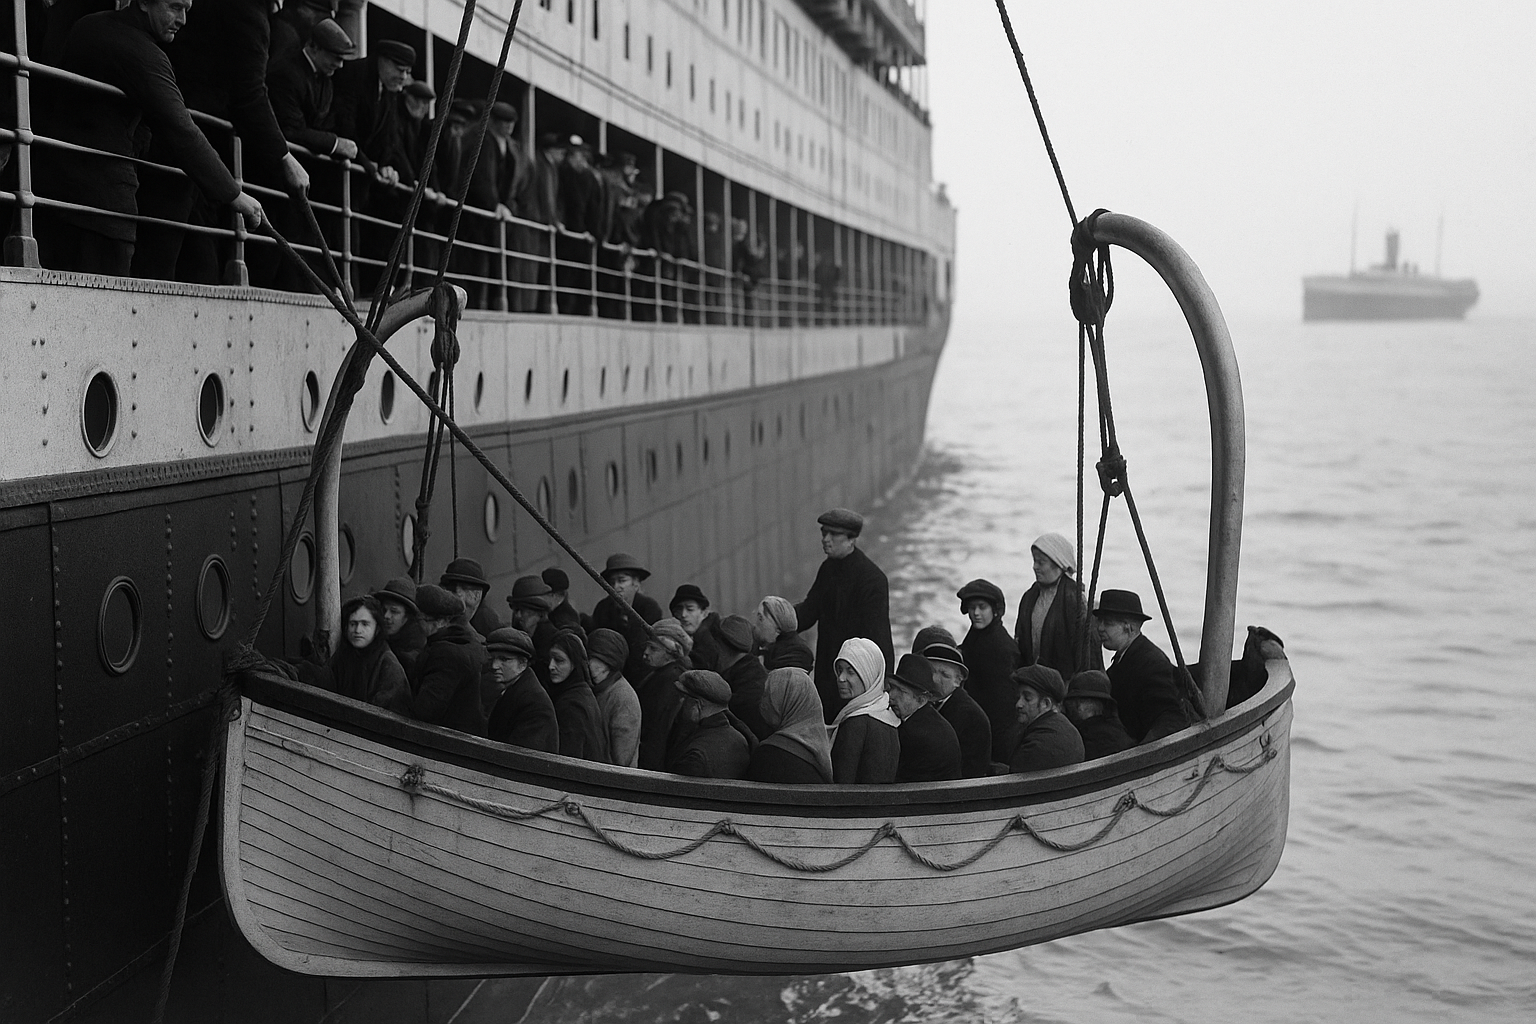